# L1

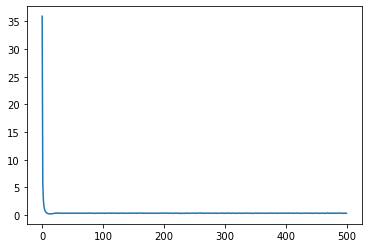

final w: [ 9.68619670e-01  4.25426183e-01 -5.27730656e-01 -1.16116240e-02
 -6.45767024e-03  2.56138332e-02  3.21698754e-02  1.34306813e-03
  9.48741370e-04 -2.89994661e-03 -2.12619655e-03 -1.82013352e-02
 -2.02933592e-02  3.72758176e-03 -8.77992657e-03 -1.21666804e-03
  3.23976230e-02  5.75352832e-03 -1.44536223e-02 -2.65191146e-02
 -2.16648596e-04 -1.67461277e-02 -8.81683921e-03 -1.89538760e-02
  1.90028613e-02  2.84241649e-03 -3.81896840e-03 -5.41937315e-03
 -1.44099916e-02 -1.20699602e-02 -4.08722364e-02 -2.02676777e-02
  4.61883773e-03  6.88061279e-03  2.81875350e-02 -1.70160646e-02
 -3.42743322e-03  4.48311523e-02  1.47634698e-02 -6.38146431e-03
 -6.34290604e-03 -2.49014214e-03 -3.91112754e-03  9.11400462e-04
  7.20586119e-03  1.29840866e-02 -2.06649686e-02 -4.35937097e-03
  4.63858655e-03 -1.24643674e-02]


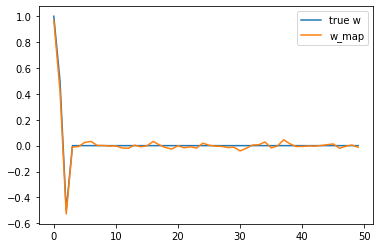

In [1]:
from __future__ import print_function, division
from builtins import range
import numpy as np
import matplotlib.pyplot as plt

N = 50
D = 50

# uniformly distributed numbers between -5, +5
X = (np.random.random((N, D)) - 0.5)*10

# true weights - only the first 3 dimensions of X affect Y
true_w = np.array([1, 0.5, -0.5] + [0]*(D - 3))

# generate Y - add noise with variance 0.5
Y = X.dot(true_w) + np.random.randn(N)*0.5

# perform gradient descent to find w
costs = [] # keep track of squared error cost
w = np.random.randn(D) / np.sqrt(D) # randomly initialize w
learning_rate = 0.001
l1 = 10.0 # Also try 5.0, 2.0, 1.0, 0.1 - what effect does it have on w?
for t in range(500):
    # update w
    Yhat = X.dot(w)
    delta = Yhat - Y
    w = w - learning_rate*(X.T.dot(delta) + l1*np.sign(w))

    # find and store the cost
    mse = delta.dot(delta) / N
    costs.append(mse)

# plot the costs
plt.plot(costs)
plt.show()

print("final w:", w)

# plot our w vs true w
plt.plot(true_w, label='true w')
plt.plot(w, label='w_map')
plt.legend()
plt.show()

# L2 

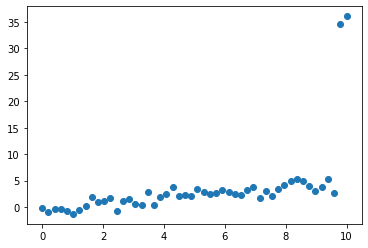

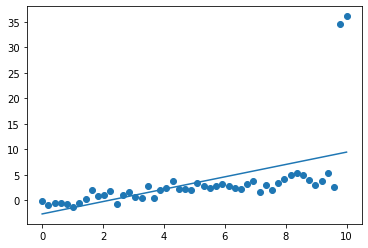

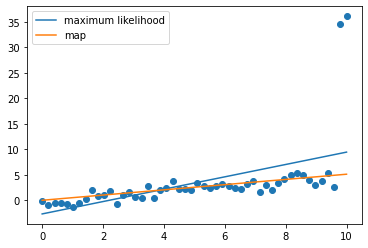

In [2]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future



import numpy as np
import matplotlib.pyplot as plt

N = 50

# generate the data
X = np.linspace(0,10,N)
Y = 0.5*X + np.random.randn(N)

# make outliers
Y[-1] += 30
Y[-2] += 30

# plot the data
plt.scatter(X, Y)
plt.show()

# add bias term
X = np.vstack([np.ones(N), X]).T

# plot the maximum likelihood solution
w_ml = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
Yhat_ml = X.dot(w_ml)
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], Yhat_ml)
plt.show()

# plot the regularized solution
# probably don't need an L2 regularization this high in many problems
# everything in this example is exaggerated for visualization purposes
l2 = 1000.0
w_map = np.linalg.solve(l2*np.eye(2) + X.T.dot(X), X.T.dot(Y))
Yhat_map = X.dot(w_map)
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], Yhat_ml, label='maximum likelihood')
plt.plot(X[:,1], Yhat_map, label='map')
plt.legend()
plt.show()